## Pertemuan 9

- Binary Thresholding
- Image Masking
- Range Thresholding (Color Segmentation)

In [107]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

___
## 1. Binary Thresholding (Image Binarization)

### 1.1 Image Binaryzation
- **Image Binarization** adalah proses membuat sebuah gambar menjadi hitam putih (image hanya memiliki nilai pixel 0 atau 255) dengan menerapkan batas threshold tertentu. 
    
- Menggunakan method `cv2.threshold(img, threshold_value, max_value, threshold_type)`
- Untuk :
    - `img` : input image
    - `threshold_value`: The thresh value with respect to which the thresholding operation is made
    - `max_value`: The value used with the Binary thresholding operations (to set the chosen pixels)
    - `threshold_type`: One of the 5 thresholding operations. 
        - `cv2.THRESH_BINARY`
        - `cv2.THRESH_BINARY_INV`
        - `cv2.THRESH_TRUNC`
        - `cv2.THRESH_TOZERO`
        - `cv2.THRESH_TOZERO_INV`
    
    
- Ilustrasi : \
![](resource/thresh.png)


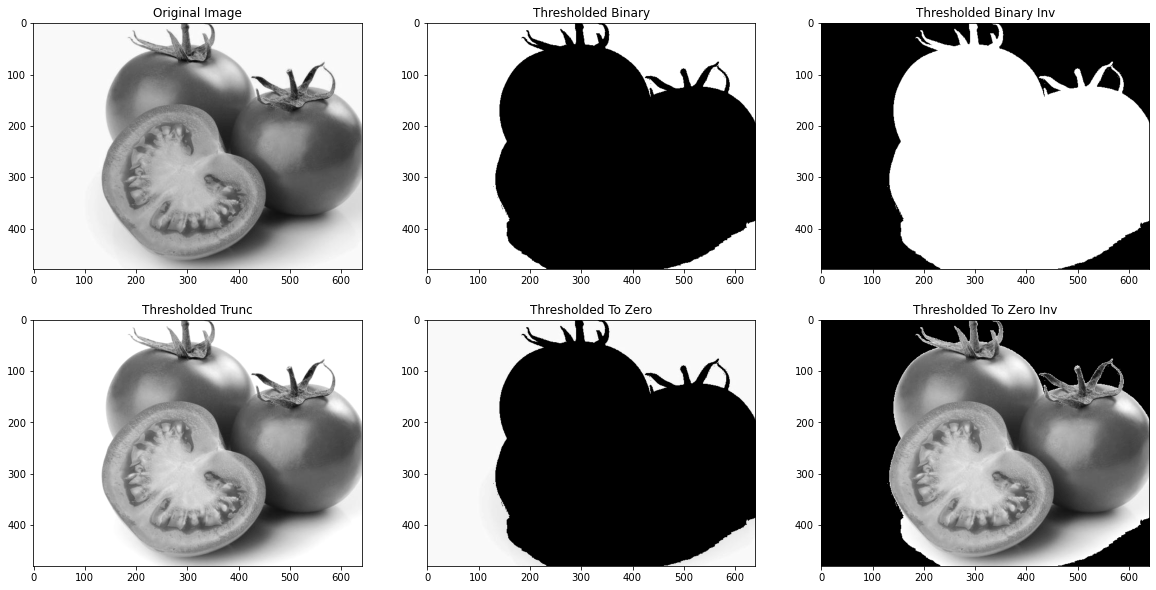

In [110]:
img = cv2.imread('Tomat.jpg')

#convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding 
# cv2.thresholding(<image>, threshold_value, max_value, threshold method)
ret1, thresh1 = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)
ret3, thresh3 = cv2.threshold(img, 230, 255, cv2.THRESH_TRUNC)
ret4, thresh4 = cv2.threshold(img, 230, 255, cv2.THRESH_TOZERO)
ret5, thresh5 = cv2.threshold(img, 230, 255, cv2.THRESH_TOZERO_INV)

#show image
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(2, 3, 2)
plt.title("Thresholded Binary")
plt.imshow(thresh1, cmap="gray")

plt.subplot(2, 3, 3)
plt.title("Thresholded Binary Inv")
plt.imshow(thresh2, cmap="gray")

plt.subplot(2, 3, 4)
plt.title("Thresholded Trunc")
plt.imshow(thresh3, cmap="gray")

plt.subplot(2, 3, 5)
plt.title("Thresholded To Zero")
plt.imshow(thresh4, cmap="gray")

plt.subplot(2, 3, 6)
plt.title("Thresholded To Zero Inv")
plt.imshow(thresh5, cmap="gray")


___
### 1.2 Buat Class Preprocessing yang memiliki method untuk Image Binaryzation

In [163]:
class Preprocessing : 
    def __init__(self, DATASET_FOLDER = "Dataset_Tomat/"):
        self.labels = []
        self.image_list = []
        self.image_binary = []
        self.image_gray = []
        self.DATASET_FOLDER = DATASET_FOLDER
        
    def ImageRead(self):
        for folder in os.listdir(self.DATASET_FOLDER):
            for file in os.listdir(self.DATASET_FOLDER + folder):
                img = cv2.imread(self.DATASET_FOLDER + folder + "/" + file)
                self.image_list.append(img)
                self.labels.append(folder) # append label (name) of image
                
    def ConvertToGray(self): 
        for img in self.image_list:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            self.image_gray.append(img)
            
    def ConvertToBinary(self, threshold_value=125, max_value=255, method = cv2.THRESH_BINARY):
        for img in self.image_gray :
            ret, thresh = cv2.threshold(img, threshold_value, max_value, method)
            self.image_binary.append(thresh)
            
    def SaveAllBinary(self, BINARY_FOLDER = "binary_tomato/"):
        if not os.path.exists(BINARY_FOLDER) :
            os.mkdir(BINARY_FOLDER)
            
        for i in range(len(self.image_binary)):

            # get image
            img = self.image_binary[i]

            # check if folder exist. if not, create that folder    
            folder_path = BINARY_FOLDER + self.labels[i] + "/"
            if not os.path.exists(folder_path) :
                os.mkdir(folder_path)

            # save image
            file_name = self.labels[i] + "_%03d.jpg" % i
            file_path = BINARY_FOLDER + self.labels[i] + "/" + file_name

            cv2.imwrite(file_path, img)

In [164]:
preprocess1 = Preprocessing(DATASET_FOLDER = "Dataset_Tomat/")

In [165]:
preprocess1.ImageRead()

In [166]:
preprocess1.ConvertToGray()

In [167]:
preprocess1.ConvertToBinary(threshold_value=220, max_value=255, method = cv2.THRESH_TOZERO_INV)

In [168]:
preprocess1.SaveAllBinary(BINARY_FOLDER = "binary_tomato/")

### 1.3 Display All Binary Image

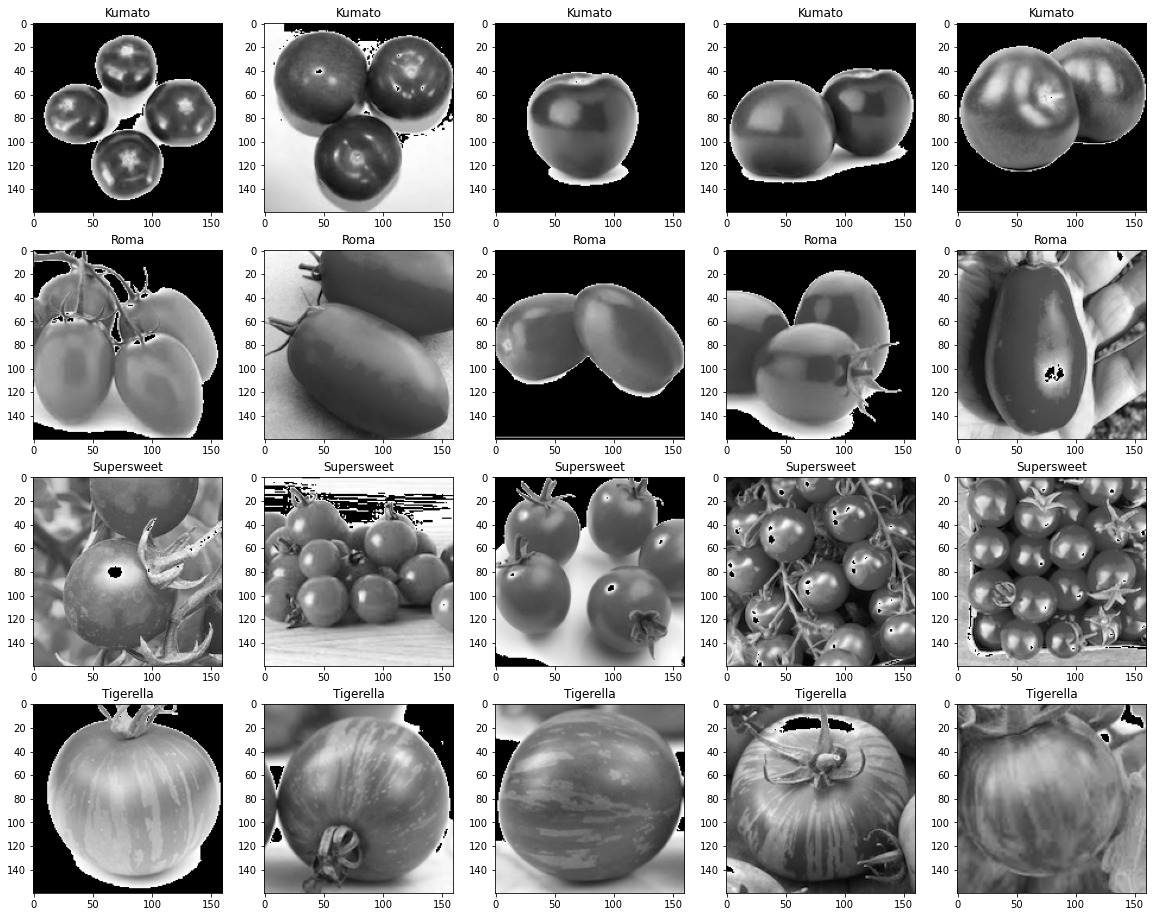

In [169]:
rows = 4
cols = 5
plt.figure(figsize=(20,16))
for i in range(len(preprocess1.image_binary)):
    img = preprocess1.image_binary[i]
    plt.subplot(rows, cols, i + 1)
    plt.title(preprocess1.labels[i])
    plt.imshow(img, cmap="gray")

### Task

- Tambahkan Method untuk **DisplayAllBinary()** menggunkan blok program display all binary diatas

## 2. Image Masking

- Highly useful while extracting any part of the image, defining and working with **non-rectangular ROI** (region of interest). <br>
  <img src="resource/sample_mask.png" style="width:500px; margin-top:10px"></img>
- Region Mask on image is user **Bitwise Operation** (AND, OR, NOT, and XOR operation).
<img src="resource/bitwise_operator.jpg" style="width:500px; margin-top:10px"></img>
- Method :
    - `cv2.bitwise_and(img1, img2, mask)`
- with parameter :
    - `img1` : input image 1
    - `img2` : input image 2
    - `mask` : optional operation mask, **8-bit single channel** array, that specifies **elements of the output array to be changed**. <br>
    <img src="resource/mask_hand.png" style="width:200px; margin-top:10px"></img>
    

- Create **White Circle**\
```cv2.circle(image_src, (x, y), r, (B, G, R), thickness)```
    - `image_src` : source image
    - `(x,y)` : center coordinate of circle
    - `r` : radius of circle
    - `(B, G, R)`, color circle
    - `thickness` : if equal to -1 ~> fill color, if > 0 ~> thickness of outline circle

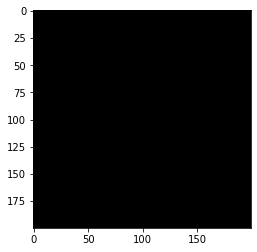

In [170]:
mask = np.zeros((200, 200)).astype(np.uint8)

plt.imshow(mask, cmap="gray")

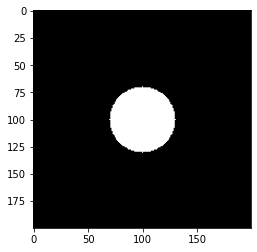

In [171]:
mask = np.zeros((200, 200)).astype(np.uint8)
cv2.circle(mask, (100, 100), 30, (255, 255,  255), -1) #create circle

plt.imshow(mask, cmap="gray")

- **Bitwise And** untuk mask lingkaran putih

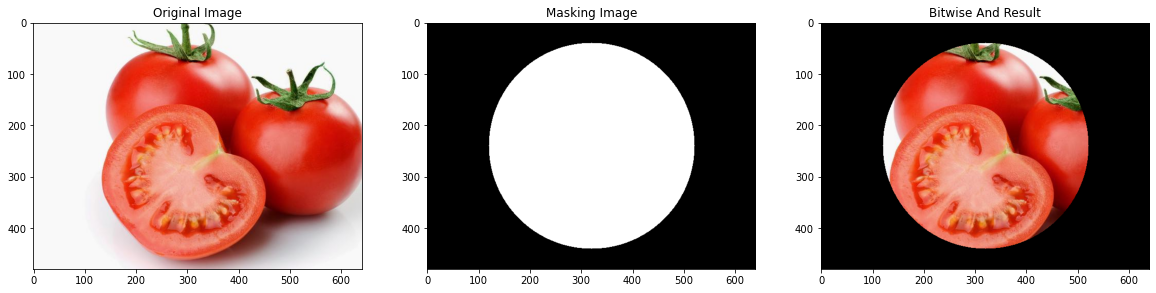

In [180]:
img = cv2.imread("Tomat.jpg")
h, w, c = img.shape

mask = np.zeros((h, w)).astype(np.uint8)
cv2.circle(mask, (w//2, h//2), 200, (255, 255,  255), -1)

res = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Bitwise And Result")
plt.imshow(res[:,:,::-1])

- **Bitwise And** untuk mask Thresholding (Background Removal)

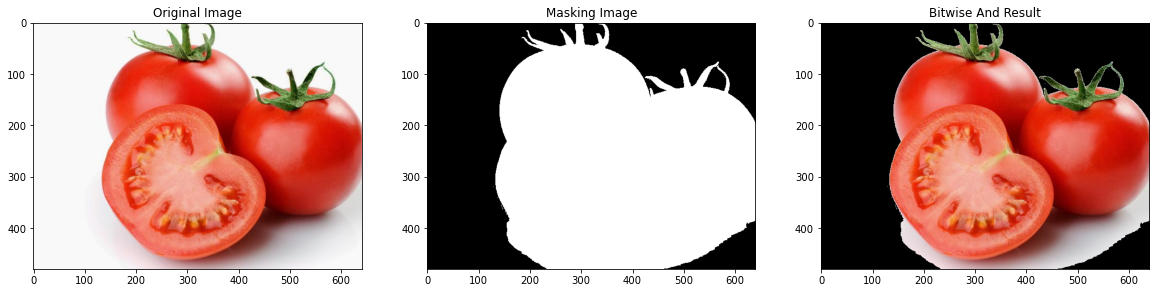

In [181]:
img = cv2.imread("Tomat.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

res = cv2.bitwise_and(img, img, mask=thresh)

plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(thresh, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Bitwise And Result")
plt.imshow(res[:,:,::-1])

### Task
- Tambahkan method RemoveBackground() ke Class Preprocessing dengan method Bitwise_And dengan mask Thresholding
- Tambahkan method untuk save all image hasil background remover ke folder

## 3. Range Thresholding

- Image thresholding using `cv2.threshold()` function. <br>
<img src="resource/Binary_Thresh.png" style="width: 500px; margin-top:10px;" > </img>
- Now we will learn how to do **range based thresholding** using  `cv2.inRange()` function. <br>
<img src="resource/Range_Thresh.png" style="width: 500px; margin-top:10px;" > </img>
- The concept remains the same, but now we add a range of pixel values we need.
- Method `cv2.inRange(img, lower_color, upper_color)`
- where theparameter :
    - `img` : input image (HSV color space)
    - `lower_color` : tuple (H, S, V) of lower color 
    - `upper_color` : tuple (H, S, V) of upper color 
- `H, S, V` value range in OpenCV:
    - `H` (0 - 180)
    - `S` (0 - 255)
    - `V` (0 - 255)
- `cv2.inRange()` using **HSV colorspace**, since the **hue channel** models the **color type**, it is very useful in image processing tasks that need to **segment objects based on its color**.<br>
<img src="resource/Threshold_inRange_HSV_colorspace.jpg" style="width: 300px; margin-top:10px;" > </img>
- Since colors in the **RGB colorspace** are coded using the **three channels**, it is **more difficult** to segment an object in the image based on its color.<br>
<img src="resource/Threshold_inRange_RGB_colorspace.jpg" style="width: 300px; margin-top:10px;" > </img>
- **HSV colorspace** model : <br>
<img src="resource/HSV_hue_model.png" style="width: 300px; margin-top:10px;" > </img>

- Conver RGB value to HSV (`cv2.cvtColor()`)

In [183]:
blue = np.uint8([[[0,255,0 ]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print( hsv_blue )

[[[ 60 255 255]]]


- Define **Color Range** (lower & upper)

In [ ]:
# define range of blue color in HSV
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# define range of red color in HSV
lower_red = np.array([-10, 50, 50])
upper_red = np.array([10, 255, 255])

# define range of green color in HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([70, 255, 255])

- Segmenting Image with specific color

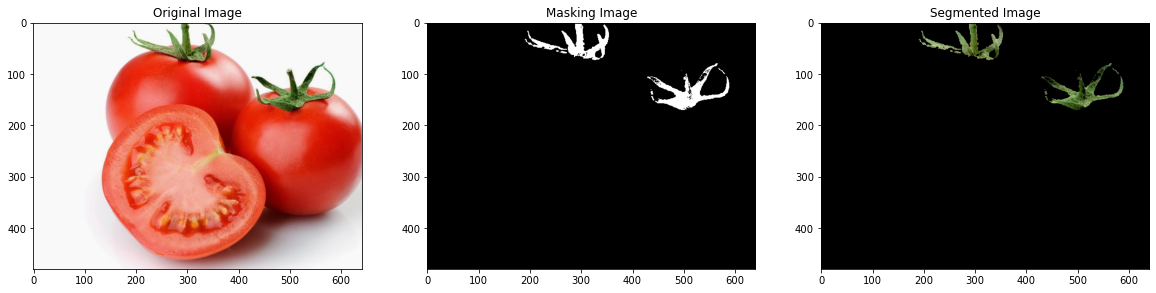

In [185]:
img = cv2.imread('Tomat.jpg')

#convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold the HSV image to get only red colors
mask = cv2.inRange(hsv.copy(), lower_green, upper_green)

res = cv2.bitwise_and(img, img, mask= mask)

plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

plt.subplot(1, 3, 2)
plt.title("Masking Image")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Segmented Image")
plt.imshow(res[:,:,::-1])

## Task
- Buat program agar bisa mendeteksi warna merah dan hijau sekaligus
    - cari mask_red, \
    `mask_red = cv2.inRange(hsv.copy(), lower_red, upper_red)`
    - cari mask_green, \
    `mask_green = cv2.inRange(hsv.copy(), lower_green, upper_green)`
    - jumlahkan kedua mask,\
    `mask = mask_red + mask_green`
    - masukan hasil mask tersebut ke `bitwise_and`

### Task 
- Tambahkan Method **SegemntaionColor()** pad class Preprocessing agar bisa crop buah tomat pada warna merah dan hijau